In [3]:
#step1-caculateasymmetry

import numpy as np
from numpy.core.arrayprint import DatetimeFormat 
    
def caculateASymmetry(readdata,writedata):
    line = readdata.readline()
    while line:
        time_Y=line.split()[0]
        time_M=line.split()[1]
        time_YM = line.split()[2]
        N_data=line.split()[4]
        S_data=line.split()[5]
        Aabs=float(N_data)-float(S_data)
        if (float(N_data)+float(S_data))==0.:
            nor=0.0
        else: 
            nor=round((float(N_data)-float(S_data))/(float(N_data)+float(S_data)),4)
        writedata.write(str(time_Y).center(6)+" "+str(time_M).center(6)+" "+str(time_YM).center(12)+' '+str(N_data).center(6)+' '+str(S_data).center(6)+" "+str(Aabs).center(6)+str(nor).center(10)+" "+'\n')
        line = readdata.readline()


caculateASymmetry(open("step4-2-regular-Month-2count-Latitude-NHSH6090.txt",'r'),open("./step5-1-regular-Month-4Asymmetry-NHSH6090.txt","w"))
caculateASymmetry(open("step4-2-regular-Month-2count-Latitude-NLSL1040.txt",'r'),open("./step5-1-regular-Month-4Asymmetry-NLSL1040.txt","w"))

caculateASymmetry(open("step4-2-specific-Month-2count-Latitude-NHSH6090.txt",'r'),open("./step5-1-specific-Month-4Asymmetry-NHSH6090.txt","w"))
caculateASymmetry(open("step4-2-specific-Month-2count-Latitude-NLSL1040.txt",'r'),open("./step5-1-specific-Month-4Asymmetry-NLSL1040.txt","w"))

timeY23BM 1996.0 1.0 2001.0 11.0
timeY23AM 2001.0 12.0 2008.0 11.0
timeY24BM 2008.0 12.0 2014.0 4.0
timeY24AM 2014.0 5.0 2020.0 12.0
Aabs609023=  0.41413722747848714
Babs609023=  0.9946677689139909
abs609023cacl_corrsmooth 0.5926650181637257
AabsNHSLAM=  0.049564095911438955
BabsNHSLAM=  -1.355926535168528
abs104023cacl_corrsmooth 0.0422027330038419


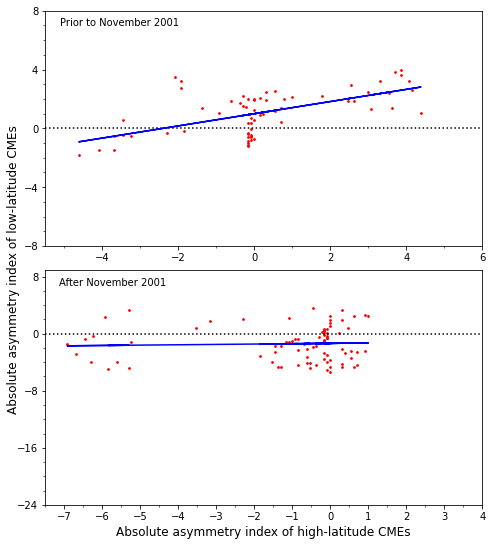

In [1]:
#step2--regular-fit-plot-cy23-Figure2
from __future__ import division
import numpy
import numpy as np
from numpy import *
from pandas import Series
import pycwt as wavelet
from pycwt.helpers import find
from sklearn import datasets, linear_model 
from numpy.core.arrayprint import DatetimeFormat
from matplotlib import *
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
from sklearn.model_selection  import train_test_split
from matplotlib.pyplot import MultipleLocator
from scipy import optimize
import matplotlib.ticker as ticker
from scipy.signal import savgol_filter

def f_1(x, A, B):
 return A * x + B

def calc_corr1(a, b):
    s1 = Series(a)
    s2 = Series(b)
    return s1.corr(s2)

time6090 = [float(l.split()[2]) for l in open("step5-1-regular-Month-4Asymmetry-NHSH6090.txt")]
absNHSH6090 = [float(l.split()[-2]) for l in open("step5-1-regular-Month-4Asymmetry-NHSH6090.txt")]
norNHSH6090 = [float(l.split()[-1]) for l in open("step5-1-regular-Month-4Asymmetry-NHSH6090.txt")]

timeY = [float(l.split()[0]) for l in open("step5-1-regular-Month-4Asymmetry-NLSL1040.txt")]
timeM = [float(l.split()[1]) for l in open("step5-1-regular-Month-4Asymmetry-NLSL1040.txt")]
time1040 = [float(l.split()[2]) for l in open("step5-1-regular-Month-4Asymmetry-NLSL1040.txt")]
absNLSL1040 = [float(l.split()[-2]) for l in open("step5-1-regular-Month-4Asymmetry-NLSL1040.txt")]
norNLSL1040 = [float(l.split()[-1]) for l in open("step5-1-regular-Month-4Asymmetry-NLSL1040.txt")]

time609023BM = time6090[0:66]
time609023AM = time6090[66:150]
time609024BM = time6090[150:215]
time609024AM = time6090[215::]
absNHSH609023BM = absNHSH6090[0:66]
absNHSH609023AM = absNHSH6090[66:150]
absNHSH609024BM = absNHSH6090[150:215]
absNHSH609024AM = absNHSH6090[215::]

time104023BM = time1040[0:66]
time104023AM = time1040[66:150]
time104024BM = time1040[150:215]
time104024AM = time1040[215::]
absNLSL104023BM = absNLSL1040[0:66]
absNLSL104023AM = absNLSL1040[66:150]
absNLSL104024BM = absNLSL1040[150:215]
absNLSL104024AM = absNLSL1040[215::]

timeY23BM = timeY[0:66]
timeY23AM = timeY[66:150]
timeY24BM = timeY[150:215]
timeY24AM = timeY[215::]

timeM23BM = timeM[0:66]
timeM23AM = timeM[66:150]
timeM24BM = timeM[150:215]
timeM24AM = timeM[215::]
print("timeY23BM",timeY23BM[0],timeM23BM[0],timeY23BM[-1],timeM23BM[-1])
print("timeY23AM",timeY23AM[0],timeM23AM[0],timeY23AM[-1],timeM23AM[-1])
print("timeY24BM",timeY24BM[0],timeM24BM[0],timeY24BM[-1],timeM24BM[-1])
print("timeY24AM",timeY24AM[0],timeM24AM[0],timeY24AM[-1],timeM24AM[-1])

absNHSH609023BM = savgol_filter(absNHSH609023BM,13, 1, mode='nearest')
absNHSH609023AM = savgol_filter(absNHSH609023AM,13, 1, mode='nearest')
absNHSH609024BM  = savgol_filter(absNHSH609024BM,13, 1, mode='nearest')
absNHSH609024AM  = savgol_filter(absNHSH609024AM,13, 1, mode='nearest')
absNLSL104023BM = savgol_filter(absNLSL104023BM,13, 1, mode='nearest')
absNLSL104023AM = savgol_filter(absNLSL104023AM,13, 1, mode='nearest')
absNLSL104024BM  = savgol_filter(absNLSL104024BM,13, 1, mode='nearest')
absNLSL104024AM  = savgol_filter(absNLSL104024AM,13, 1, mode='nearest')

fig = plt.figure(figsize =(6.9,7.5))
plt.subplots_adjust(left=0.10, bottom=0.065, right=0.98, top=0.98, wspace=0.10, hspace=0.10)
ax1 = host_subplot(211)
ax1.scatter(absNHSH609023BM,absNLSL104023BM,c="red",s=3)
#ax1.set_xlabel("Calendar Year",fontsize = 12)
#ax1.invert_yaxis()
ax1.set_xlim(-5.5,6.0)
ax1.set_ylim(-8.0,8.0)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.axhline(y=0., ls=':', c='k')

Aabs609023BM, Babs609023BM = optimize.curve_fit(f_1, absNHSH609023BM,absNLSL104023BM)[0]
preabsNLSL104023BM = []
for x1 in absNHSH609023BM:
    y1 = Aabs609023BM*x1 + Babs609023BM
    preabsNLSL104023BM.append(y1)
ax1.plot(absNHSH609023BM, preabsNLSL104023BM,lw=1.5,c="blue")
print("Aabs609023= ",Aabs609023BM)
print("Babs609023= ",Babs609023BM)
print("abs609023cacl_corrsmooth",calc_corr1(absNHSH609023BM,absNLSL104023BM))
#ax1.text(1996.2,35.0, "cycle23 Correlation Coefficient: -0.273, fitpar: A= -1.279 B= 2558.15 ", fontsize=4.0, va='center',rotation=0.0)
#ax1.text(1996.2,32.5, "cycle24 Correlation Coefficient: -0.132, fitpar: A= -1.109 B= 2242.13 ", fontsize=4.0, va='center',rotation=0.0)
ax1.text(-5.1, 7.2, "Prior to November 2001", fontsize = 10, va='center')

ax2 = host_subplot(212)
ax2.scatter(absNHSH609023AM,absNLSL104023AM,c="red",s=3)
ax2.set_xlabel('Absolute asymmetry index of high-latitude CMEs',fontsize=12)
#ax2.set_ylabel("Absolute asymmetry values of the CMEs at low latitudes in cycle 23",fontsize = 12)
ax2.text(-8.5,9.0, "Absolute asymmetry index of low-latitude CMEs", fontsize=12, va='center', rotation=90)
ax2.set_xlim(-7.5,4)
ax2.set_ylim(-24.0,9.0)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(8))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(2))
#ax2.text(1996.2,75.0, "Correlation Coefficient: 0.091, fitpar: A= -0.279 B= -560.02 ", fontsize=4.0, va='center',rotation=0.0)
ax2.axhline(y=0., ls=':', c='k')
#ax2.plot([2001.917,2001.917],[-120.0,120.0],"darkgray",lw=1.0,linestyle="--")
#ax2.plot([2009.0,2009.0],[-120.0,120.0],"black",lw=1.0,linestyle="-")
#ax2.plot([2014.333,2014.333],[-120.0,120.0],"darkgray",lw=1.0,linestyle="--")

AabsNHSLAM, BabsNHSLAM = optimize.curve_fit(f_1, absNHSH609023AM,absNLSL104023AM)[0]
preabsNLSL104023AM = []
for x1 in absNHSH609023AM:
    y1 = AabsNHSLAM*x1 + BabsNHSLAM
    preabsNLSL104023AM.append(y1)
ax2.plot(absNHSH609023AM, preabsNLSL104023AM,lw=1.5,c="blue")
print("AabsNHSLAM= ",AabsNHSLAM)
print("BabsNHSLAM= ",BabsNHSLAM)
print("abs104023cacl_corrsmooth",calc_corr1(absNHSH609023AM,absNLSL104023AM))
#ax2.text(1996.2,70.0, "cycle23 Correlation Coefficient: -0.273, fitpar: A= -1.279 B= 2558.15 ", fontsize=4.0, va='center',rotation=0.0
ax2.text(-7.15, 7.2, "After November 2001", fontsize = 10, va='center', rotation=0)
#plt.savefig('step5-1-regular-asymmetry-fit-cy23-Figure2.eps', format='eps',dpi=1000)
#plt.savefig('step5-1-regular-asymmetry-fit-cy23-Figure2.png', format='png',dpi=1000)
plt.show()

timeY23BM 1996.0 1.0 2001.0 11.0
timeY23AM 2001.0 12.0 2008.0 11.0
timeY24BM 2008.0 12.0 2014.0 4.0
timeY24AM 2014.0 5.0 2020.0 12.0
Aabs609024=  0.7972198219460354
Babs609024=  -0.7985706422473746
abs609024cacl_corrsmooth 0.8816274758488472
AabsNHSLAM=  0.8041268265199849
BabsNHSLAM=  0.09199803556914371
abs104024cacl_corrsmooth 0.46483556921503233


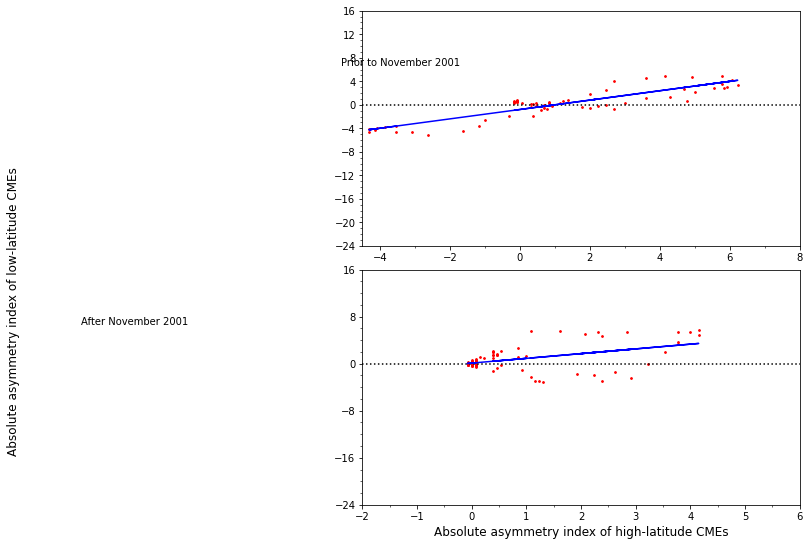

In [14]:
#step2-regular-fit-plot-cy24-Figure3
from __future__ import division
import numpy
import numpy as np
from numpy import *
from pandas import Series
import pycwt as wavelet
from pycwt.helpers import find
from sklearn import datasets, linear_model 
from numpy.core.arrayprint import DatetimeFormat
from matplotlib import *
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
from sklearn.model_selection  import train_test_split
from matplotlib.pyplot import MultipleLocator
from scipy import optimize
import matplotlib.ticker as ticker
from scipy.signal import savgol_filter

def f_1(x, A, B):
 return A * x + B

def calc_corr1(a, b):
    s1 = Series(a)
    s2 = Series(b)
    return s1.corr(s2)

time6090 = [float(l.split()[2]) for l in open("step5-1-regular-Month-4Asymmetry-NHSH6090.txt")]
absNHSH6090 = [float(l.split()[-2]) for l in open("step5-1-regular-Month-4Asymmetry-NHSH6090.txt")]
norNHSH6090 = [float(l.split()[-1]) for l in open("step5-1-regular-Month-4Asymmetry-NHSH6090.txt")]

timeY = [float(l.split()[0]) for l in open("step5-1-regular-Month-4Asymmetry-NLSL1040.txt")]
timeM = [float(l.split()[1]) for l in open("step5-1-regular-Month-4Asymmetry-NLSL1040.txt")]
time1040 = [float(l.split()[2]) for l in open("step5-1-regular-Month-4Asymmetry-NLSL1040.txt")]
absNLSL1040 = [float(l.split()[-2]) for l in open("step5-1-regular-Month-4Asymmetry-NLSL1040.txt")]
norNLSL1040 = [float(l.split()[-1]) for l in open("step5-1-regular-Month-4Asymmetry-NLSL1040.txt")]

time609023BM = time6090[0:66]
time609023AM = time6090[66:150]
time609024BM = time6090[150:215]
time609024AM = time6090[215::]
absNHSH609023BM = absNHSH6090[0:66]
absNHSH609023AM = absNHSH6090[66:150]
absNHSH609024BM = absNHSH6090[150:215]
absNHSH609024AM = absNHSH6090[215::]

time104023BM = time1040[0:66]
time104023AM = time1040[66:150]
time104024BM = time1040[150:215]
time104024AM = time1040[215::]
absNLSL104023BM = absNLSL1040[0:66]
absNLSL104023AM = absNLSL1040[66:150]
absNLSL104024BM = absNLSL1040[150:215]
absNLSL104024AM = absNLSL1040[215::]

timeY23BM = timeY[0:66]
timeY23AM = timeY[66:150]
timeY24BM = timeY[150:215]
timeY24AM = timeY[215::]

timeM23BM = timeM[0:66]
timeM23AM = timeM[66:150]
timeM24BM = timeM[150:215]
timeM24AM = timeM[215::]
print("timeY23BM",timeY23BM[0],timeM23BM[0],timeY23BM[-1],timeM23BM[-1])
print("timeY23AM",timeY23AM[0],timeM23AM[0],timeY23AM[-1],timeM23AM[-1])
print("timeY24BM",timeY24BM[0],timeM24BM[0],timeY24BM[-1],timeM24BM[-1])
print("timeY24AM",timeY24AM[0],timeM24AM[0],timeY24AM[-1],timeM24AM[-1])

absNHSH609023BM = savgol_filter(absNHSH609023BM,13, 1, mode='nearest')
absNHSH609023AM = savgol_filter(absNHSH609023AM,13, 1, mode='nearest')
absNHSH609024BM  = savgol_filter(absNHSH609024BM,13, 1, mode='nearest')
absNHSH609024AM  = savgol_filter(absNHSH609024AM,13, 1, mode='nearest')
absNLSL104023BM = savgol_filter(absNLSL104023BM,13, 1, mode='nearest')
absNLSL104023AM = savgol_filter(absNLSL104023AM,13, 1, mode='nearest')
absNLSL104024BM  = savgol_filter(absNLSL104024BM,13, 1, mode='nearest')
absNLSL104024AM  = savgol_filter(absNLSL104024AM,13, 1, mode='nearest')

fig = plt.figure(figsize =(6.9,7.5))
plt.subplots_adjust(left=0.10, bottom=0.065, right=0.98, top=0.98, wspace=0.10, hspace=0.10)
ax1 = host_subplot(211)
ax1.scatter(absNHSH609024BM,absNLSL104024BM,c="red",s=3)
#ax1.set_xlabel("Calendar Year",fontsize = 12)
#ax1.invert_yaxis()
ax1.set_xlim(-4.5,8.0)
ax1.set_ylim(-24.0,16.0)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.axhline(y=0., ls=':', c='k')

Aabs609024BM, Babs609024BM = optimize.curve_fit(f_1, absNHSH609024BM,absNLSL104024BM)[0]
preabsNLSL104024BM = []
for x1 in absNHSH609024BM:
    y1 = Aabs609024BM*x1 + Babs609024BM
    preabsNLSL104024BM.append(y1)
ax1.plot(absNHSH609024BM, preabsNLSL104024BM,lw=1.5,c="blue")
print("Aabs609024= ",Aabs609024BM)
print("Babs609024= ",Babs609024BM)
print("abs609024cacl_corrsmooth",calc_corr1(absNHSH609024BM,absNLSL104024BM))
#ax1.text(1996.2,35.0, "cycle24 Correlation Coefficient: -0.273, fitpar: A= -1.279 B= 2558.15 ", fontsize=4.0, va='center',rotation=0.0)
#ax1.text(1996.2,32.5, "cycle24 Correlation Coefficient: -0.132, fitpar: A= -1.109 B= 2242.13 ", fontsize=4.0, va='center',rotation=0.0)
ax1.text(-5.1, 7.2, "Prior to November 2001", fontsize = 10, va='center')

ax2 = host_subplot(212)
ax2.scatter(absNHSH609024AM,absNLSL104024AM,c="red",s=3)
ax2.set_xlabel('Absolute asymmetry index of high-latitude CMEs',fontsize=12)
ax2.text(-8.5,9.0, "Absolute asymmetry index of low-latitude CMEs", fontsize=12, va='center', rotation=90)
ax2.set_xlim(-2.0,6.0)
ax2.set_ylim(-24.0,16.0)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(8))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(2))
#ax2.text(1996.2,75.0, "Correlation Coefficient: 0.091, fitpar: A= -0.279 B= -560.02 ", fontsize=4.0, va='center',rotation=0.0)
ax2.axhline(y=0., ls=':', c='k')
#ax2.plot([2001.917,2001.917],[-120.0,120.0],"darkgray",lw=1.0,linestyle="--")
#ax2.plot([2009.0,2009.0],[-120.0,120.0],"black",lw=1.0,linestyle="-")
#ax2.plot([2014.333,2014.333],[-120.0,120.0],"darkgray",lw=1.0,linestyle="--")

AabsNHSLAM, BabsNHSLAM = optimize.curve_fit(f_1, absNHSH609024AM,absNLSL104024AM)[0]
preabsNLSL104024AM = []
for x1 in absNHSH609024AM:
    y1 = AabsNHSLAM*x1 + BabsNHSLAM
    preabsNLSL104024AM.append(y1)
ax2.plot(absNHSH609024AM, preabsNLSL104024AM,lw=1.5,c="blue")
print("AabsNHSLAM= ",AabsNHSLAM)
print("BabsNHSLAM= ",BabsNHSLAM)
print("abs104024cacl_corrsmooth",calc_corr1(absNHSH609024AM,absNLSL104024AM))
#ax2.text(1996.2,70.0, "cycle24 Correlation Coefficient: -0.273, fitpar: A= -1.279 B= 2558.15 ", fontsize=4.0, va='center',rotation=0.0
ax2.text(-7.15, 7.2, "After November 2001", fontsize = 10, va='center', rotation=0)
plt.savefig('step5-1-regular-Month-5fit-Asymmetry-HLlatitudescy24-Figure3.eps', format='eps',dpi=1000)
plt.savefig('step5-1-regular-Month-5fit-Asymmetry-HLlatitudescy24-Figure3.png', format='png',dpi=1000)
plt.show()

timeY23BM 1996.0 1.0 2001.0 10.0
timeY23AM 2001.0 11.0 2008.0 10.0
timeY24BM 2008.0 11.0 2014.0 3.0
timeY24AM 2014.0 4.0 2020.0 12.0
Aabs609023=  0.28753048487508526
Babs609023=  0.9673785493836135
abs609023cacl_corrsmooth 0.2080556974085842
AabsNHSLAM=  -2.186856390982494
BabsNHSLAM=  -3.4155654057238785
abs104023cacl_corrsmooth -0.6056085654048311


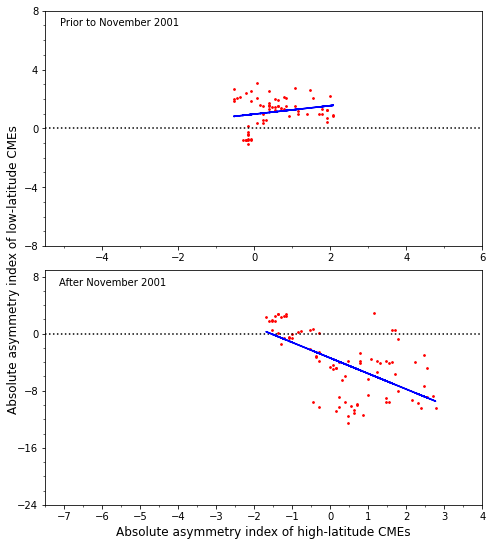

In [15]:
#step2--specific-fit-plot-cy23-Figure2
from __future__ import division
import numpy
import numpy as np
from numpy import *
from pandas import Series
import pycwt as wavelet
from pycwt.helpers import find
from sklearn import datasets, linear_model 
from numpy.core.arrayprint import DatetimeFormat
from matplotlib import *
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
from sklearn.model_selection  import train_test_split
from matplotlib.pyplot import MultipleLocator
from scipy import optimize
import matplotlib.ticker as ticker
from scipy.signal import savgol_filter

def f_1(x, A, B):
 return A * x + B

def calc_corr1(a, b):
    s1 = Series(a)
    s2 = Series(b)
    return s1.corr(s2)

time6090 = [float(l.split()[2]) for l in open("step5-1-specific-Month-4Asymmetry-NHSH6090.txt")]
absNHSH6090 = [float(l.split()[-2]) for l in open("step5-1-specific-Month-4Asymmetry-NHSH6090.txt")]
norNHSH6090 = [float(l.split()[-1]) for l in open("step5-1-specific-Month-4Asymmetry-NHSH6090.txt")]

timeY = [float(l.split()[0]) for l in open("step5-1-specific-Month-4Asymmetry-NLSL1040.txt")]
timeM = [float(l.split()[1]) for l in open("step5-1-specific-Month-4Asymmetry-NLSL1040.txt")]
time1040 = [float(l.split()[2]) for l in open("step5-1-specific-Month-4Asymmetry-NLSL1040.txt")]
absNLSL1040 = [float(l.split()[-2]) for l in open("step5-1-specific-Month-4Asymmetry-NLSL1040.txt")]
norNLSL1040 = [float(l.split()[-1]) for l in open("step5-1-specific-Month-4Asymmetry-NLSL1040.txt")]

time609023BM = time6090[0:66]
time609023AM = time6090[66:150]
time609024BM = time6090[150:215]
time609024AM = time6090[215::]
absNHSH609023BM = absNHSH6090[0:66]
absNHSH609023AM = absNHSH6090[66:150]
absNHSH609024BM = absNHSH6090[150:215]
absNHSH609024AM = absNHSH6090[215::]

time104023BM = time1040[0:66]
time104023AM = time1040[66:150]
time104024BM = time1040[150:215]
time104024AM = time1040[215::]
absNLSL104023BM = absNLSL1040[0:66]
absNLSL104023AM = absNLSL1040[66:150]
absNLSL104024BM = absNLSL1040[150:215]
absNLSL104024AM = absNLSL1040[215::]

timeY23BM = timeY[0:66]
timeY23AM = timeY[66:150]
timeY24BM = timeY[150:215]
timeY24AM = timeY[215::]

timeM23BM = timeM[0:66]
timeM23AM = timeM[66:150]
timeM24BM = timeM[150:215]
timeM24AM = timeM[215::]
print("timeY23BM",timeY23BM[0],timeM23BM[0],timeY23BM[-1],timeM23BM[-1])
print("timeY23AM",timeY23AM[0],timeM23AM[0],timeY23AM[-1],timeM23AM[-1])
print("timeY24BM",timeY24BM[0],timeM24BM[0],timeY24BM[-1],timeM24BM[-1])
print("timeY24AM",timeY24AM[0],timeM24AM[0],timeY24AM[-1],timeM24AM[-1])

absNHSH609023BM = savgol_filter(absNHSH609023BM,13, 1, mode='nearest')
absNHSH609023AM = savgol_filter(absNHSH609023AM,13, 1, mode='nearest')
absNHSH609024BM  = savgol_filter(absNHSH609024BM,13, 1, mode='nearest')
absNHSH609024AM  = savgol_filter(absNHSH609024AM,13, 1, mode='nearest')
absNLSL104023BM = savgol_filter(absNLSL104023BM,13, 1, mode='nearest')
absNLSL104023AM = savgol_filter(absNLSL104023AM,13, 1, mode='nearest')
absNLSL104024BM  = savgol_filter(absNLSL104024BM,13, 1, mode='nearest')
absNLSL104024AM  = savgol_filter(absNLSL104024AM,13, 1, mode='nearest')

fig = plt.figure(figsize =(6.9,7.5))
plt.subplots_adjust(left=0.10, bottom=0.065, right=0.98, top=0.98, wspace=0.10, hspace=0.10)
ax1 = host_subplot(211)
ax1.scatter(absNHSH609023BM,absNLSL104023BM,c="red",s=3)
#ax1.set_xlabel("Calendar Year",fontsize = 12)
#ax1.invert_yaxis()
ax1.set_xlim(-5.5,6.0)
ax1.set_ylim(-8.0,8.0)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.axhline(y=0., ls=':', c='k')

Aabs609023BM, Babs609023BM = optimize.curve_fit(f_1, absNHSH609023BM,absNLSL104023BM)[0]
preabsNLSL104023BM = []
for x1 in absNHSH609023BM:
    y1 = Aabs609023BM*x1 + Babs609023BM
    preabsNLSL104023BM.append(y1)
ax1.plot(absNHSH609023BM, preabsNLSL104023BM,lw=1.5,c="blue")
print("Aabs609023= ",Aabs609023BM)
print("Babs609023= ",Babs609023BM)
print("abs609023cacl_corrsmooth",calc_corr1(absNHSH609023BM,absNLSL104023BM))
#ax1.text(1996.2,35.0, "cycle23 Correlation Coefficient: -0.273, fitpar: A= -1.279 B= 2558.15 ", fontsize=4.0, va='center',rotation=0.0)
#ax1.text(1996.2,32.5, "cycle24 Correlation Coefficient: -0.132, fitpar: A= -1.109 B= 2242.13 ", fontsize=4.0, va='center',rotation=0.0)
ax1.text(-5.1, 7.2, "Prior to November 2001", fontsize = 10, va='center')

ax2 = host_subplot(212)
ax2.scatter(absNHSH609023AM,absNLSL104023AM,c="red",s=3)
ax2.set_xlabel('Absolute asymmetry index of high-latitude CMEs',fontsize=12)
#ax2.set_ylabel("Absolute asymmetry values of the CMEs at low latitudes in cycle 23",fontsize = 12)
ax2.text(-8.5,9.0, "Absolute asymmetry index of low-latitude CMEs", fontsize=12, va='center', rotation=90)
ax2.set_xlim(-7.5,4)
ax2.set_ylim(-24.0,9.0)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(8))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(2))
#ax2.text(1996.2,75.0, "Correlation Coefficient: 0.091, fitpar: A= -0.279 B= -560.02 ", fontsize=4.0, va='center',rotation=0.0)
ax2.axhline(y=0., ls=':', c='k')
#ax2.plot([2001.917,2001.917],[-120.0,120.0],"darkgray",lw=1.0,linestyle="--")
#ax2.plot([2009.0,2009.0],[-120.0,120.0],"black",lw=1.0,linestyle="-")
#ax2.plot([2014.333,2014.333],[-120.0,120.0],"darkgray",lw=1.0,linestyle="--")

AabsNHSLAM, BabsNHSLAM = optimize.curve_fit(f_1, absNHSH609023AM,absNLSL104023AM)[0]
preabsNLSL104023AM = []
for x1 in absNHSH609023AM:
    y1 = AabsNHSLAM*x1 + BabsNHSLAM
    preabsNLSL104023AM.append(y1)
ax2.plot(absNHSH609023AM, preabsNLSL104023AM,lw=1.5,c="blue")
print("AabsNHSLAM= ",AabsNHSLAM)
print("BabsNHSLAM= ",BabsNHSLAM)
print("abs104023cacl_corrsmooth",calc_corr1(absNHSH609023AM,absNLSL104023AM))
#ax2.text(1996.2,70.0, "cycle23 Correlation Coefficient: -0.273, fitpar: A= -1.279 B= 2558.15 ", fontsize=4.0, va='center',rotation=0.0
ax2.text(-7.15, 7.2, "After November 2001", fontsize = 10, va='center', rotation=0)
plt.savefig('step5-1-specific-Month-5fit-Asymmetry-HLlatitudescy23-Figure2.eps', format='eps',dpi=1000)
plt.savefig('step5-1-specific-Month-5fit-Asymmetry-HLlatitudescy23-Figure2.png', format='png',dpi=1000)
plt.show()

timeY23BM 1996.0 1.0 2001.0 10.0
timeY23AM 2001.0 11.0 2008.0 10.0
timeY24BM 2008.0 11.0 2014.0 3.0
timeY24AM 2014.0 4.0 2020.0 12.0
Aabs609024=  1.1392839119278961
Babs609024=  -5.127388476549774
abs609024cacl_corrsmooth 0.7456242662888012
AabsNHSLAM=  -0.7751766683614147
BabsNHSLAM=  0.7870747659028818
abs104024cacl_corrsmooth -0.4968079992086239


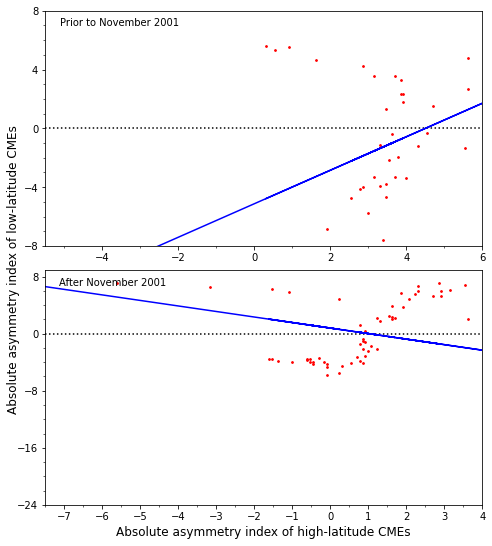

In [16]:
#step2--specific-fit-plot-cy23-Figure2
from __future__ import division
import numpy
import numpy as np
from numpy import *
from pandas import Series
import pycwt as wavelet
from pycwt.helpers import find
from sklearn import datasets, linear_model 
from numpy.core.arrayprint import DatetimeFormat
from matplotlib import *
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
from sklearn.model_selection  import train_test_split
from matplotlib.pyplot import MultipleLocator
from scipy import optimize
import matplotlib.ticker as ticker
from scipy.signal import savgol_filter

def f_1(x, A, B):
 return A * x + B

def calc_corr1(a, b):
    s1 = Series(a)
    s2 = Series(b)
    return s1.corr(s2)

time6090 = [float(l.split()[2]) for l in open("step5-1-specific-Month-4Asymmetry-NHSH6090.txt")]
absNHSH6090 = [float(l.split()[-2]) for l in open("step5-1-specific-Month-4Asymmetry-NHSH6090.txt")]
norNHSH6090 = [float(l.split()[-1]) for l in open("step5-1-specific-Month-4Asymmetry-NHSH6090.txt")]

timeY = [float(l.split()[0]) for l in open("step5-1-specific-Month-4Asymmetry-NLSL1040.txt")]
timeM = [float(l.split()[1]) for l in open("step5-1-specific-Month-4Asymmetry-NLSL1040.txt")]
time1040 = [float(l.split()[2]) for l in open("step5-1-specific-Month-4Asymmetry-NLSL1040.txt")]
absNLSL1040 = [float(l.split()[-2]) for l in open("step5-1-specific-Month-4Asymmetry-NLSL1040.txt")]
norNLSL1040 = [float(l.split()[-1]) for l in open("step5-1-specific-Month-4Asymmetry-NLSL1040.txt")]

time609023BM = time6090[0:66]
time609023AM = time6090[66:150]
time609024BM = time6090[150:215]
time609024AM = time6090[215::]
absNHSH609023BM = absNHSH6090[0:66]
absNHSH609023AM = absNHSH6090[66:150]
absNHSH609024BM = absNHSH6090[150:215]
absNHSH609024AM = absNHSH6090[215::]

time104023BM = time1040[0:66]
time104023AM = time1040[66:150]
time104024BM = time1040[150:215]
time104024AM = time1040[215::]
absNLSL104023BM = absNLSL1040[0:66]
absNLSL104023AM = absNLSL1040[66:150]
absNLSL104024BM = absNLSL1040[150:215]
absNLSL104024AM = absNLSL1040[215::]

timeY23BM = timeY[0:66]
timeY23AM = timeY[66:150]
timeY24BM = timeY[150:215]
timeY24AM = timeY[215::]

timeM23BM = timeM[0:66]
timeM23AM = timeM[66:150]
timeM24BM = timeM[150:215]
timeM24AM = timeM[215::]
print("timeY23BM",timeY23BM[0],timeM23BM[0],timeY23BM[-1],timeM23BM[-1])
print("timeY23AM",timeY23AM[0],timeM23AM[0],timeY23AM[-1],timeM23AM[-1])
print("timeY24BM",timeY24BM[0],timeM24BM[0],timeY24BM[-1],timeM24BM[-1])
print("timeY24AM",timeY24AM[0],timeM24AM[0],timeY24AM[-1],timeM24AM[-1])

absNHSH609023BM = savgol_filter(absNHSH609023BM,13, 1, mode='nearest')
absNHSH609023AM = savgol_filter(absNHSH609023AM,13, 1, mode='nearest')
absNHSH609024BM  = savgol_filter(absNHSH609024BM,13, 1, mode='nearest')
absNHSH609024AM  = savgol_filter(absNHSH609024AM,13, 1, mode='nearest')
absNLSL104023BM = savgol_filter(absNLSL104023BM,13, 1, mode='nearest')
absNLSL104023AM = savgol_filter(absNLSL104023AM,13, 1, mode='nearest')
absNLSL104024BM  = savgol_filter(absNLSL104024BM,13, 1, mode='nearest')
absNLSL104024AM  = savgol_filter(absNLSL104024AM,13, 1, mode='nearest')
fig = plt.figure(figsize =(6.9,7.5))
plt.subplots_adjust(left=0.10, bottom=0.065, right=0.98, top=0.98, wspace=0.10, hspace=0.10)
ax1 = host_subplot(211)
ax1.scatter(absNHSH609024BM,absNLSL104024BM,c="red",s=3)
#ax1.set_xlabel("Calendar Year",fontsize = 12)
#ax1.invert_yaxis()
ax1.set_xlim(-5.5,6.0)
ax1.set_ylim(-8.0,8.0)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.axhline(y=0., ls=':', c='k')

Aabs609024BM, Babs609024BM = optimize.curve_fit(f_1, absNHSH609024BM,absNLSL104024BM)[0]
preabsNLSL104024BM = []
for x1 in absNHSH609024BM:
    y1 = Aabs609024BM*x1 + Babs609024BM
    preabsNLSL104024BM.append(y1)
ax1.plot(absNHSH609024BM, preabsNLSL104024BM,lw=1.5,c="blue")
print("Aabs609024= ",Aabs609024BM)
print("Babs609024= ",Babs609024BM)
print("abs609024cacl_corrsmooth",calc_corr1(absNHSH609024BM,absNLSL104024BM))
#ax1.text(1996.2,35.0, "cycle24 Correlation Coefficient: -0.273, fitpar: A= -1.279 B= 2558.15 ", fontsize=4.0, va='center',rotation=0.0)
#ax1.text(1996.2,32.5, "cycle24 Correlation Coefficient: -0.132, fitpar: A= -1.109 B= 2242.13 ", fontsize=4.0, va='center',rotation=0.0)
ax1.text(-5.1, 7.2, "Prior to November 2001", fontsize = 10, va='center')

ax2 = host_subplot(212)
ax2.scatter(absNHSH609024AM,absNLSL104024AM,c="red",s=3)
ax2.set_xlabel('Absolute asymmetry index of high-latitude CMEs',fontsize=12)
#ax2.set_ylabel("Absolute asymmetry values of the CMEs at low latitudes in cycle 24",fontsize = 12)
ax2.text(-8.5,9.0, "Absolute asymmetry index of low-latitude CMEs", fontsize=12, va='center', rotation=90)
ax2.set_xlim(-7.5,4)
ax2.set_ylim(-24.0,9.0)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(8))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(2))
#ax2.text(1996.2,75.0, "Correlation Coefficient: 0.091, fitpar: A= -0.279 B= -560.02 ", fontsize=4.0, va='center',rotation=0.0)
ax2.axhline(y=0., ls=':', c='k')
#ax2.plot([2001.917,2001.917],[-120.0,120.0],"darkgray",lw=1.0,linestyle="--")
#ax2.plot([2009.0,2009.0],[-120.0,120.0],"black",lw=1.0,linestyle="-")
#ax2.plot([2014.333,2014.333],[-120.0,120.0],"darkgray",lw=1.0,linestyle="--")

AabsNHSLAM, BabsNHSLAM = optimize.curve_fit(f_1, absNHSH609024AM,absNLSL104024AM)[0]
preabsNLSL104024AM = []
for x1 in absNHSH609024AM:
    y1 = AabsNHSLAM*x1 + BabsNHSLAM
    preabsNLSL104024AM.append(y1)
ax2.plot(absNHSH609024AM, preabsNLSL104024AM,lw=1.5,c="blue")
print("AabsNHSLAM= ",AabsNHSLAM)
print("BabsNHSLAM= ",BabsNHSLAM)
print("abs104024cacl_corrsmooth",calc_corr1(absNHSH609024AM,absNLSL104024AM))
#ax2.text(1996.2,70.0, "cycle24 Correlation Coefficient: -0.273, fitpar: A= -1.279 B= 2558.15 ", fontsize=4.0, va='center',rotation=0.0
ax2.text(-7.15, 7.2, "After November 2001", fontsize = 10, va='center', rotation=0)
plt.savefig('step5-1-specific-Month-5fit-Asymmetry-HLlatitudescy24-Figure2.eps', format='eps',dpi=1000)
plt.savefig('step5-1-specific-Month-5fit-Asymmetry-HLlatitudescy24-Figure2.png', format='png',dpi=1000)
plt.show()